In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # statistical data visualization
import warnings
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('breast_cancer.csv')

df['Class'].replace(2,0,inplace=True)
df['Class'].replace(4,1,inplace=True)

**CFIS: Combined Feature Importance Score**


1. **Introdução**

O CFIS (Combined Feature Importance Score) é uma métrica desenvolvida para avaliar a importância das features em problemas de aprendizado de máquina. Ele combina várias abordagens para calcular a importância das features, incluindo a importância de permutação, coeficientes de modelos de regressão e correlação com a variável alvo.

2. **Objetivo**

O objetivo do CFIS é fornecer uma maneira abrangente de avaliar a importância das features em um modelo de aprendizado de máquina. Ao combinar diferentes métricas, o CFIS pode capturar diferentes aspectos da importância das features e fornecer uma visão mais completa sobre como cada feature contribui para a predição do modelo.

3. **Métodos**

  3.1. **Importância de Permutação**
A importância de permutação é calculada embaralhando os valores de uma feature e medindo como isso afeta o desempenho do modelo. O CFIS usa a média das importâncias de permutação para cada feature como uma métrica de importância.

  3.2. **Coeficientes de Modelos de Regressão**
Os coeficientes de modelos de regressão, como regressão logística, fornecem uma medida da contribuição de cada feature para a predição do modelo. O CFIS normaliza esses coeficientes e os utiliza como uma métrica de importância.

  3.3. **Correlação com a Variável Alvo**
A correlação entre cada feature e a variável alvo é calculada para avaliar o relacionamento entre elas. O CFIS incorpora essa correlação como parte de sua pontuação combinada.

  3.4. **CFIS: Pontuação Combinada**
O CFIS é calculado como a média das métricas de importância de permutação, coeficientes de regressão e correlações. Isso proporciona uma medida abrangente da importância de cada feature.

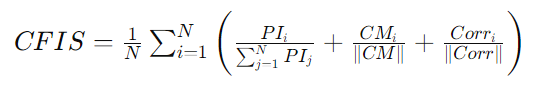



4. **Exemplo de Uso**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LogisticRegression

def combined_feature_selection(df):
    # Dividir os dados em features (X) e target (y)
    X = df.drop('class', axis=1)  # Features
    y = df['class']  # Variável alvo

    # Inicializar o modelo de regressão logística
    logreg = LogisticRegression()
    logreg.fit(X, y)

    # Calcular a importância das features usando Permutation Importance
    result = permutation_importance(logreg, X, y, n_repeats=10, random_state=42)

    # Coletar as importâncias das features
    importances_permutation = result.importances_mean

    # Normalizar as importâncias das features para que a soma seja igual a 1
    normalized_importances_permutation = importances_permutation / np.sum(importances_permutation)

    # Coletar os coeficientes do modelo após o ajuste
    coefficients = logreg.coef_[0]

    # Normalizar os coeficientes
    normalized_coefficients = coefficients / np.linalg.norm(coefficients)

    # Calcular a correlação entre as features e a variável alvo
    correlation_scores = X.apply(lambda feature: feature.corr(y))

    # Calcular o CFIS como a média das métricas de importância, coeficientes e correlações
    combined_score = (normalized_importances_permutation + normalized_coefficients + correlation_scores) / 3

    # Normalizar as pontuações CFIS para que a soma seja igual a 100
    cfis_percentage = (combined_score / np.sum(combined_score)) * 100

    # Criar um DataFrame com as features e suas pontuações de Permutation Importance, coeficientes, correlações,
    # pontuações combinadas e porcentagens de importância CFIS
    feature_scores = pd.DataFrame({
        'Permutation Importance': normalized_importances_permutation,
        'Coefficient': coefficients,
        'Correlation': correlation_scores,
        'CFIS': combined_score,
        'CFIS (%)': cfis_percentage
    }, index=X.columns)

    # Ordenar os resultados de acordo com o CFIS em ordem decrescente
    sorted_features = feature_scores.sort_values(by='CFIS', ascending=False)

    # Formatar a coluna CFIS para destacar com uma cor diferente
    def highlight_cfis(value):
        if value > 0:
            return 'background-color: lightgreen'
        elif value < 0:
            return 'background-color: salmon'
        else:
            return ''

    # Aplicar a formatação de cores à coluna CFIS e ajustar a formatação da porcentagem
    sorted_features_styled = sorted_features.style.applymap(highlight_cfis, subset=['CFIS']).format({'CFIS (%)': '{:.2f}%'}).set_table_styles([{
        'selector': 'th',
        'props': [('text-align', 'left')]
    }])

    return sorted_features_styled

# Chamar a função com o dataframe df
sorted_features = combined_feature_selection(df)

# Exibir as features classificadas de acordo com a métrica CFIS
print("Features classificadas de acordo com a métrica CFIS(Combined Feature Importance Score):")
sorted_features


Features classificadas de acordo com a métrica CFIS(Combined Feature Importance Score):


,Permutation Importance,Coefficient,Correlation,CFIS,CFIS (%)
Bare Nuclei,0.409471,0.381048,0.822696,0.532035,15.76%
Clump Thickness,0.334262,0.525734,0.714790,0.517059,15.32%
Bland Chromatin,0.147632,0.433038,0.758228,0.439818,13.03%
Uniformity of Cell Shape,0.030641,0.311252,0.821891,0.383269,11.35%
Marginal Adhesion,0.011142,0.320957,0.706294,0.341327,10.11%
Mitoses,0.086351,0.482733,0.423448,0.323618,9.59%
Normal Nucleoli,-0.008357,0.211017,0.718677,0.303954,9.00%
Uniformity of Cell Size,-0.005571,0.011726,0.820801,0.275476,8.16%
Single Epithelial Cell Size,-0.005571,0.097666,0.690958,0.259556,7.69%
